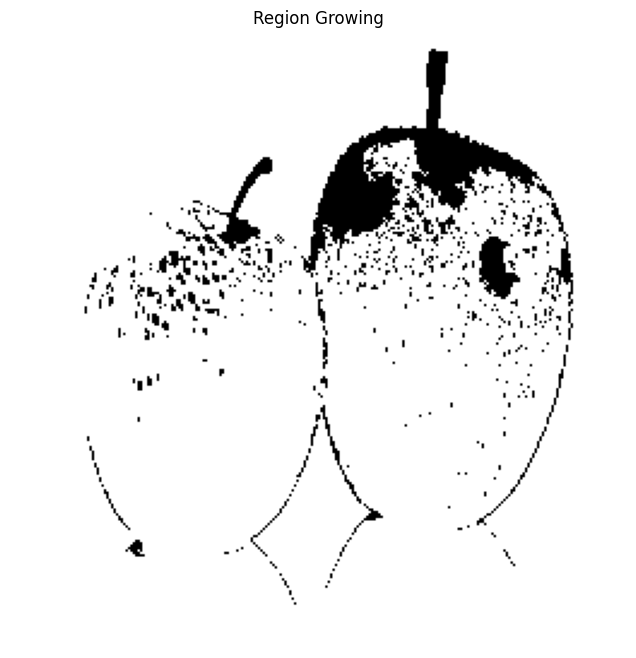

In [2]:
from segmentacion import region_growing
import cv2

image = cv2.imread('apple.jpg', 0)
threshold = 10
region_growing(image, threshold)

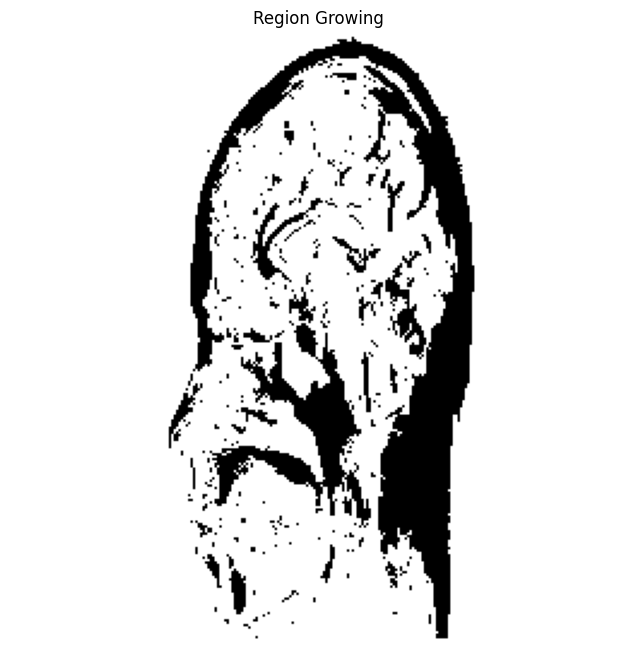

In [3]:
image = cv2.imread('mri.jpg', 0)
threshold = 12
region_growing(image, threshold)